<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/RegressionAnalysisforCHIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Let's start with the problem:

The company acquired data through a survey that had been responded by current tenants. Q6 is que question that represents the overall satisfaction, therefore we could think it as the dependent variable. Its causes are customer service quality, information and understading of the service, quality of repairs, and others.

In [115]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
survey_data = pd.read_excel("/De-identified Raw Data CHIA NSW v2.xlsx")
survey_data = survey_data.drop(0)
print("In total the dataset has:", survey_data.shape[0], "rows and", survey_data.shape[1], "columns" )
survey_data.head(4)

In total the dataset has: 446 rows and 36 columns


,Program,Region,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q9,...,Q29,Q30,Q31,Q32,Q34,Q35,Q36,LGA,PROGRAM_C,State
1,LEASEHOLD,WAGGA WAGGA,Man,55-59,No,"""English""",Very satisfied,Very satisfied,Very satisfied,Yes,...,"""Could not pay gas, electricity or telephone b...",NaN,By email,"""Very satisfied""",Fairly satisfied,Very satisfied,"""Education Scholarships"",""Learner driver progr...",WAGGA,LEASEHOLD,NSW
2,CAPITAL,WAGGA WAGGA,Man,55-59,No,"""English""",Neither,Fairly satisfied,Neither,Yes,...,"""No/none of these""",NaN,By phone,"""Fairly satisfied""",Neither,Neither,"""Education Scholarships"",""Learner driver progr...",WAGGA,CAPITAL,NSW
3,CAPITAL,WAGGA WAGGA,Woman,30-34,No,"""English""",Fairly satisfied,Very satisfied,Very satisfied,Yes,...,"""Were unable to heat your home""",NaN,By email,"""Very satisfied""",Very satisfied,Very satisfied,"""Education Scholarships""",WAGGA,CAPITAL,NSW
4,CAPITAL,SUTHERLAND,Man,70-74,No,"""English""",Very satisfied,Very satisfied,Fairly satisfied,Yes,...,"""No/none of these""",NaN,By phone,"""Fairly satisfied""",Fairly satisfied,Fairly satisfied,"""Education Scholarships"",""Learner driver progr...",SUTHERLAND,CAPITAL,NSW


In [117]:
for column in survey_data.columns:
  uniques = survey_data[column].unique()
  print(column, len(uniques), uniques)

Program 3 ['LEASEHOLD' 'CAPITAL' 'BOARDING']
Region 8 ['WAGGA WAGGA' 'SUTHERLAND' 'LISMORE' 'ALBURY' 'PORT KEMBLA' 'TAREE'
 'DUBBO' 'BROKEN HILL']
Q1 5 ['Man' 'Woman' 'Prefer not to disclose' nan 'Non-binary']
Q2 17 ['55-59' '30-34' '70-74' '40-44' '25-29' '45-49' '50-54' '60-64' '35-39'
 '65-69' '75-79' '80-84' '15-19' nan '20-24' '85-89' '90-94']
Q3 5 ['No' 'Yes, Aboriginal' 'Yes, Torres Strait Islander' 'Yes, both' nan]
Q4 6 ['"English"' '"Spanish"' '"Mandarin"' '"Other"' nan '"English","Other"']
Q6 5 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Q7 6 ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied' nan]
Q8 6 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Fairly dissatisfied'
 'Very dissatisfied' nan]
Q9 4 ['Yes' 'Unsure' 'No' nan]
Q10 6 ['Very satisfied' 'Very dissatisfied' 'Fairly satisfied'
 'Fairly dissatisfied' 'Neither' nan]
Q11 6 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatis

## A) Shape and Null analysis

(446, 36)
Program        0
Region         0
Q1             7
Q2             6
Q3            22
Q4             5
Q6             0
Q7             4
Q8             2
Q9             7
Q10           10
Q11            4
Q12            5
Q13          310
Q14            4
Q15            8
Q16           83
Q18           12
Q19          395
Q19a         396
Q19b         393
Q19c         395
Q20            6
Q21           11
Q22           11
Q25           15
Q29           35
Q30          359
Q31           34
Q32           35
Q34           36
Q35           39
Q36          204
LGA            0
PROGRAM_C      0
State          0
dtype: int64


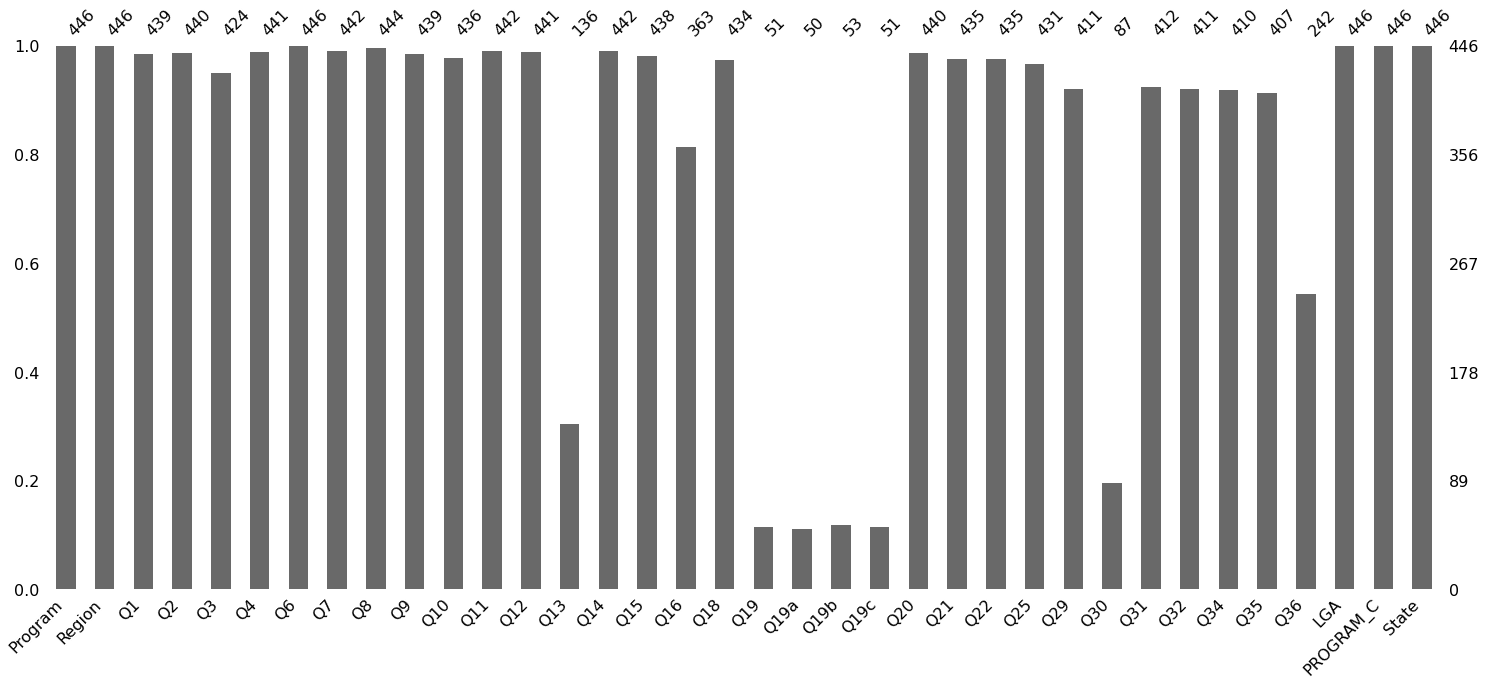

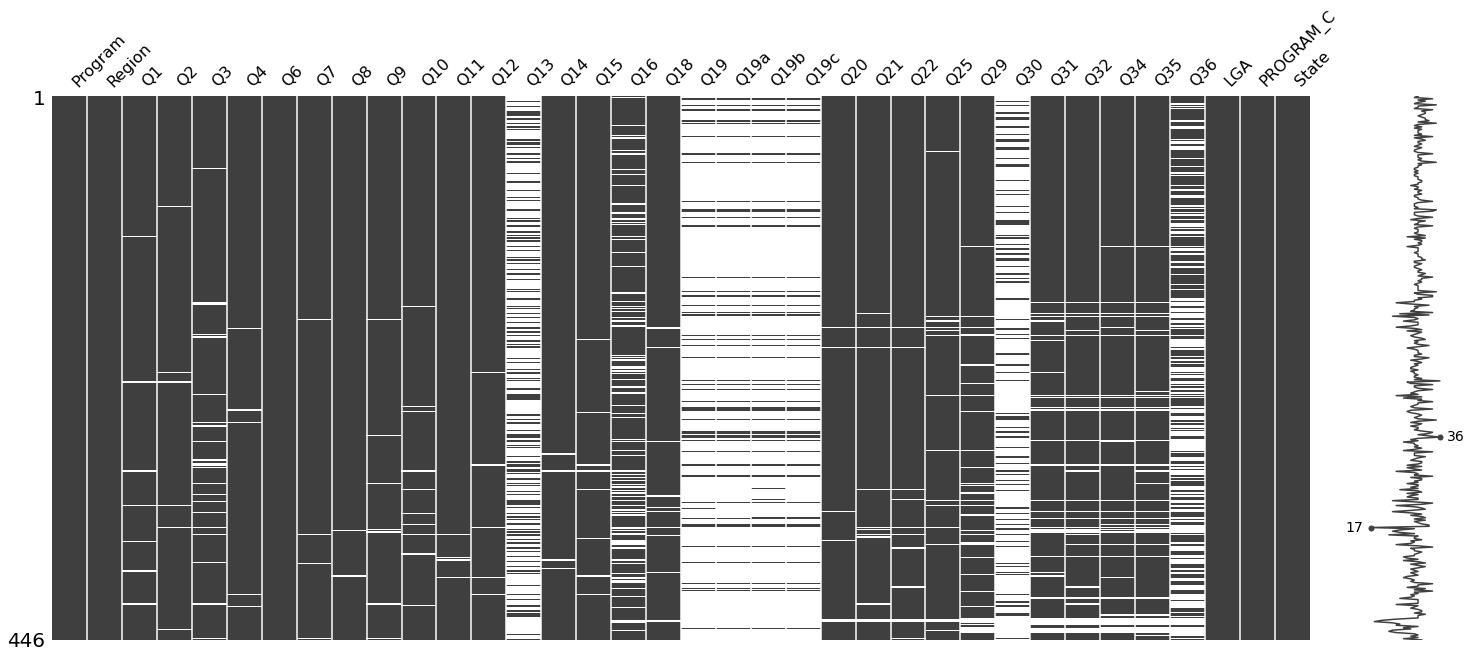

In [118]:
import missingno as msno
print(survey_data.shape)
print(survey_data.isnull().sum())
display(msno.bar(survey_data))
display(msno.matrix(survey_data))

In [129]:
print(survey_data.columns)

Index(['Program', 'Region', 'Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q18', 'Q19', 'Q19a',
       'Q19b', 'Q19c', 'Q20', 'Q21', 'Q22', 'Q25', 'Q29', 'Q30', 'Q31', 'Q32',
       'Q34', 'Q35', 'Q36', 'LGA', 'PROGRAM_C', 'State'],
      dtype='object')


In [130]:
# List of columns to drop

columns_drop = ['Program', 'Region', 'Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q13', 'Q16', 'Q19', 'Q19a',
       'Q19b', 'Q19c', 'Q21', 'Q22', 'Q25', 'Q29', 'Q30', 'Q31', 'Q32',
       'Q34', 'Q35', 'Q36', 'LGA', 'PROGRAM_C', 'State']

survey_data.drop(columns_drop, axis=1)

""
1
2
3
4
5
...
442
443
444
445


## B) Droping variables and preprocessing

Seems the survey has 28 variables. 27 independent and the overall satisfaction which we need to discover their key predictors.

In [101]:
survey_data.loc[,survey_data.columns.str.startswith("Q")]

SyntaxError: ignored

### Q1

In [53]:
# How many categories we have in the selected column?

unique_q1 = survey_data["Q1"].unique()
print("How many categories?:", unique_q1.shape[0],"\nList: ", unique_q1)

How many categories?: 5 
List:  ['Man' 'Woman' 'Prefer not to disclose' nan 'Non-binary']


In [54]:
# How many rows do we have for those who declared being neither Man nor Woman?

survey_data[~survey_data["Q1"].isin(["Man","Woman"])].shape[0]

13

In [64]:
# Only 13 rows are no man or woman we create only one non binary category called "Other"

survey_data.loc[~survey_data["Q1"].isin(["Man","Woman"]),"Q1"] = "Other"

In [65]:
# Control 

unique_q1 = survey_data["Q1"].unique()
print("How many categories?:", unique_q1.shape[0],"\nList: ", unique_q1)

How many categories?: 3 
List:  ['Man' 'Woman' 'Other']


### Q2 (1- Needs better imputing technique, 2- 15 to 19 is a valid age category?)

In [66]:
# How many categories we have in the selected column?

unique_q2 = survey_data["Q2"].unique()
print("How many categories?:", unique_q2.shape[0],"\nList: ", unique_q2)

How many categories?: 17 
List:  ['55-59' '30-34' '70-74' '40-44' '25-29' '45-49' '50-54' '60-64' '35-39'
 '65-69' '75-79' '80-84' '15-19' nan '20-24' '85-89' '90-94']


In [87]:
# How many nans do we have? Can we impute?
print("There are:", survey_data["Q2"].isnull().sum(), "rows that are null")

# The first approach would be to impute into the middle values of age like 40-44: 
survey_data.loc[survey_data["Q2"].isnull(), "Q2"] = "40-44"

There are: 6 rows that are null


In [89]:
# Control 

unique_q2 = survey_data["Q2"].unique()
print("How many categories?:", unique_q2.shape[0],"\nList: ", unique_q2)

How many categories?: 16 
List:  ['55-59' '30-34' '70-74' '40-44' '25-29' '45-49' '50-54' '60-64' '35-39'
 '65-69' '75-79' '80-84' '15-19' '20-24' '85-89' '90-94']


### Q3

In [90]:
# How many categories we have in the selected column?

unique_q3 = survey_data["Q3"].unique()
print("How many categories?:", unique_q3.shape[0],"\nList: ", unique_q3)

How many categories?: 5 
List:  ['No' 'Yes, Aboriginal' 'Yes, Torres Strait Islander' 'Yes, both' nan]


In [92]:
# How many nans do we have? Can we impute?
print("There are:", survey_data["Q3"].isnull().sum(), "rows that are null")

# Impute nans to No
survey_data.loc[survey_data["Q3"].isnull(), "Q3"] = "No"

There are: 22 rows that are null


In [94]:
# Impute all Yes in one category
survey_data.loc[survey_data["Q3"].str.contains("Yes"), "Q3"] = "Yes"

In [95]:
# Control 

unique_q3 = survey_data["Q3"].unique()
print("How many categories?:", unique_q3.shape[0],"\nList: ", unique_q3)

How many categories?: 2 
List:  ['No' 'Yes']


### Q4

In [96]:
# How many categories we have in the selected column?

unique_q4 = survey_data["Q4"].unique()
print("How many categories?:", unique_q4.shape[0],"\nList: ", unique_q4)

How many categories?: 6 
List:  ['"English"' '"Spanish"' '"Mandarin"' '"Other"' nan '"English","Other"']


### Q6 the dependent variable

In [103]:
# How many categories we have in the selected column?

unique_q6 = survey_data["Q6"].unique()
print("How many categories?:", unique_q6.shape[0],"\nList: ", unique_q6)

How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']


### Q7

In [105]:
# How many categories we have in the selected column?

unique_q7 = survey_data["Q7"].unique()
print("How many categories?:", unique_q7.shape[0],"\nList: ", unique_q7)

How many categories?: 6 
List:  ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied' nan]


In [ ]:
# Drop Nulls and categorize between Statisfied, Dissatisfied and Neither
survey_data["Q7"].dropna()

## b) Checking nulls 

Program        0
Region         0
Q1             0
Q2             0
Q3             0
Q4             5
Q6             0
Q7             4
Q8             2
Q9             7
Q10           10
Q11            4
Q12            5
Q13          310
Q14            4
Q15            8
Q16           83
Q18           12
Q19          395
Q19a         396
Q19b         393
Q19c         395
Q20            6
Q21           11
Q22           11
Q25           15
Q29           35
Q30          359
Q31           34
Q32           35
Q34           36
Q35           39
Q36          204
LGA            0
PROGRAM_C      0
State          0
dtype: int64


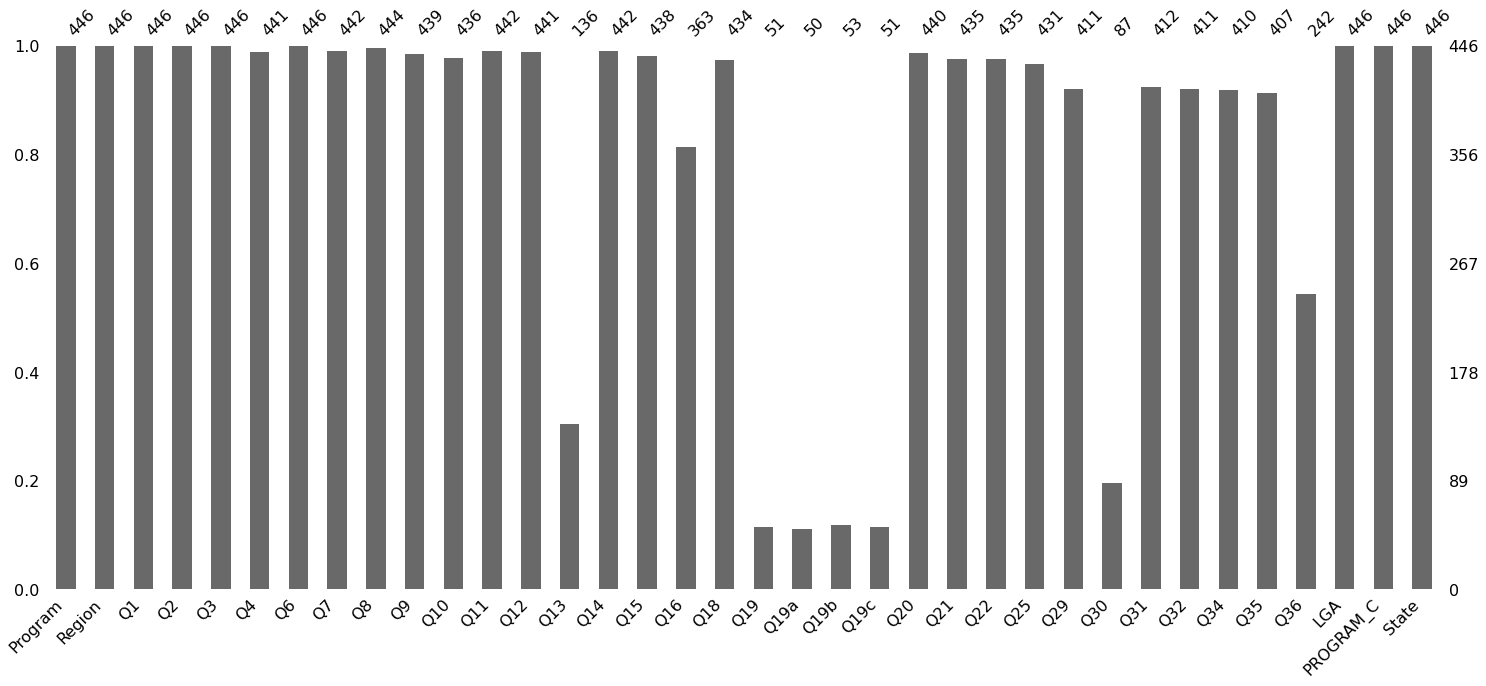

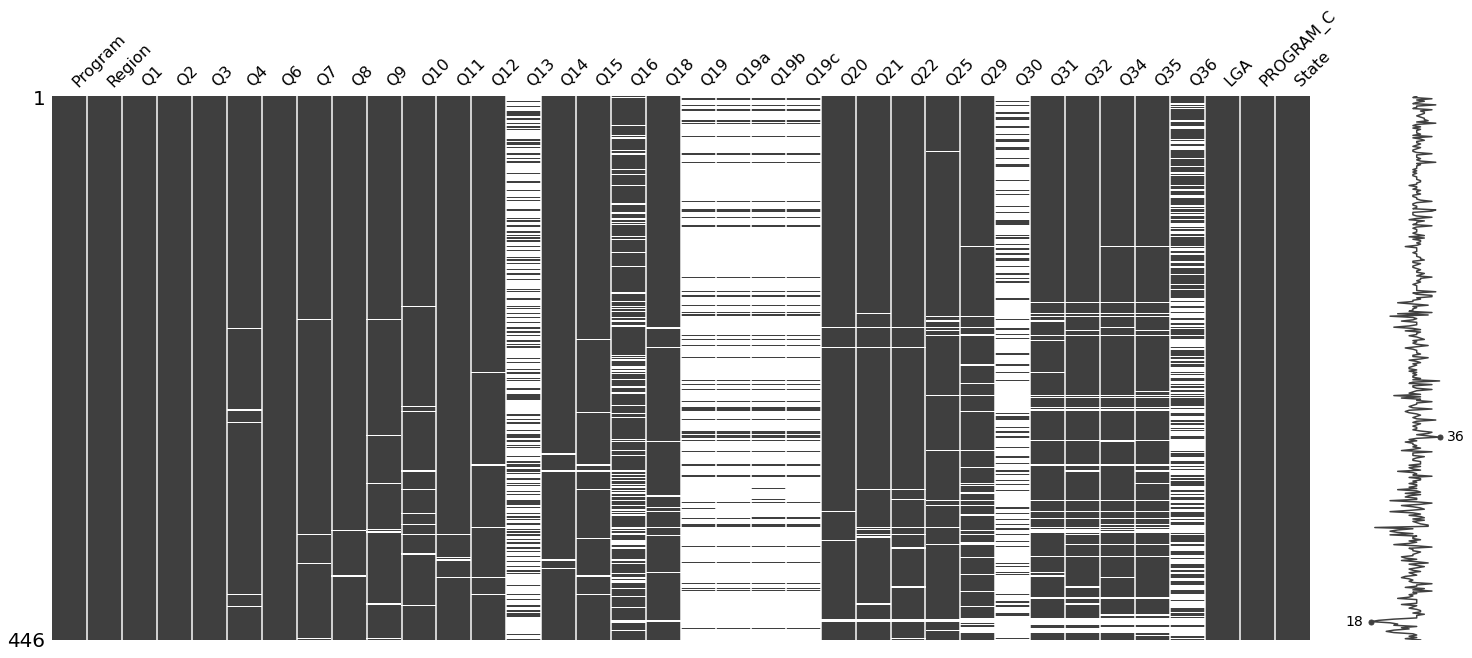

In [114]:
import missingno as msno
print(survey_data.isnull().sum())
display(msno.bar(survey_data))
display(msno.matrix(survey_data))